In [1]:
from utils import *
from IPython.display import Latex

%matplotlib inline
%load_ext lab_black

In [2]:
data_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
output_folder = "/home/gillard/Bureau/PhD School/ETHZ Project/Results"
image_folder = "Results"

In [3]:
events = pd.read_csv(f"{data_folder}/Events.csv")  # , nrows=10000)
attributes = pd.read_csv(f"{data_folder}/Attributes.csv")  # , nrows=1000000)
tags = pd.read_csv(f"{data_folder}/Tags.csv")  # , nrows=10000)
organisations = pd.read_csv(f"{data_folder}/Organisations.csv")  # , nrows=10000)

/home/gillard/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
attributes = attributes[attributes["Orgc ID"] != 1203]
attributes["Value"].replace("", np.nan, inplace=True)
attributes.dropna(subset=["Value"], inplace=True)
Value_ID = attributes["Value"].astype("category").cat.codes
attributes["Value ID"] = Value_ID
attributes = attributes[attributes["Value ID"].duplicated(keep=False)]

In [16]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304800 entries, 28 to 9423341
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Event ID            object 
 1   Orgc ID             float64
 2   Org ID              float64
 3   Attribute ID        float64
 4   UUID                object 
 5   Attribute Type      object 
 6   Attribute Category  object 
 7   Distribution        float64
 8   Timestamp           float64
 9   Event Date          object 
 10  Event Published     float64
 11  Published           object 
 12  Deleted             object 
 13  Value               object 
 14  Comment             object 
 15  Value ID            int32  
dtypes: float64(6), int32(1), object(9)
memory usage: 793.7+ MB


/home/gillard/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute ID', ylabel='Value ID'>

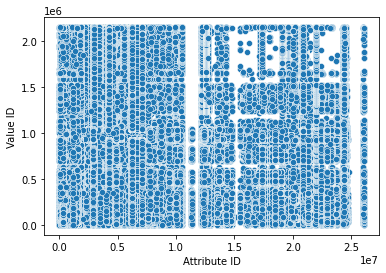

In [17]:
sns.scatterplot(attributes["Attribute ID"], attributes["Value ID"])

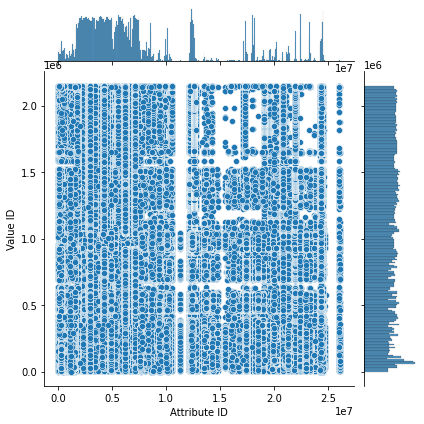

In [18]:
sns.jointplot(x=attributes["Attribute ID"], y=attributes["Value ID"])

(array([[6304800.]]),
 array([4.0000000e+00, 2.6076662e+07]),
 array([      0., 2149903.]),
 <matplotlib.collections.QuadMesh at 0x7fa83059feb0>)

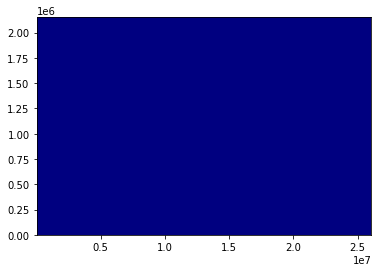

In [19]:
plt.hist2d(attributes["Attribute ID"], attributes["Value ID"], bins=1, cmap="jet")

In [21]:
Inheritance = attributes["Value ID"].value_counts()
print(Inheritance)

1518993    1075
352395      769
349329      747
801970      690
352448      678
           ... 
604170        2
591884        2
595982        2
653330        2
0             2
Name: Value ID, Length: 2149904, dtype: int64
